# Trainning and evaluating Random Forest Model

In [45]:
# Setup

import os

import pandas as pd
import numpy as np

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualization
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [32]:
parent_abs = os.path.abspath(os.path.join(os.getcwd(),os.pardir))
df = pd.read_csv(os.path.join(parent_abs,'data\\featured.csv'),index_col=0)

In [38]:
y = df.iloc[:,0]
x = df.iloc[:,1:]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [41]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
y_pred = rf.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8095238095238095


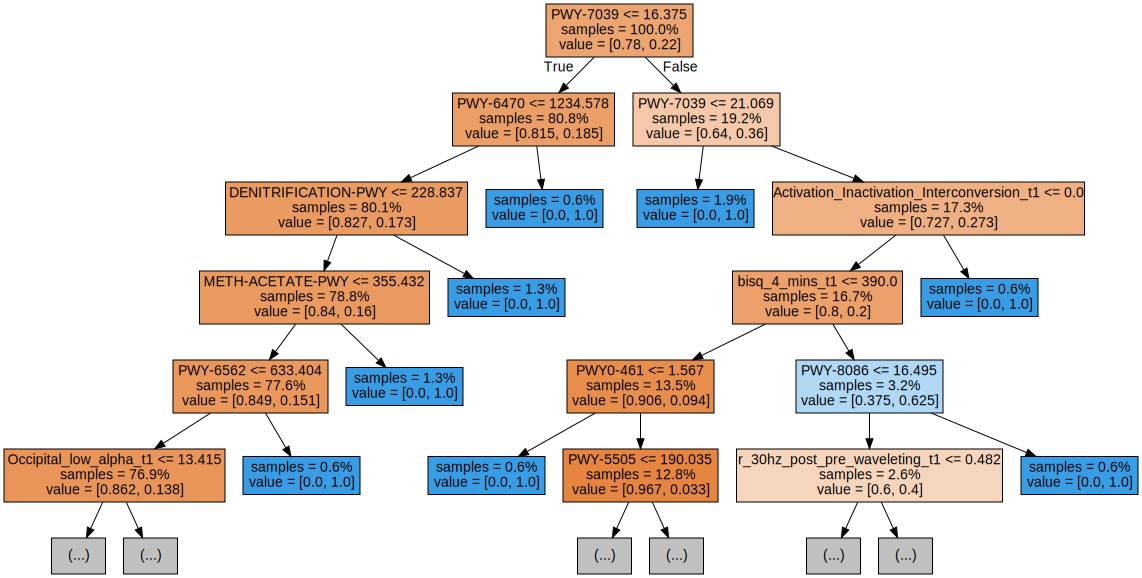

In [56]:
tree = rf.estimators_[i]
dot_data = export_graphviz(tree,feature_names=X_train.columns,filled=True,max_depth=5,impurity=False,proportion=True)

graph = graphviz.Source(dot_data)
display(graph)

In [72]:
# Hyperparameter Tuning

param_dist = {'n_estimators':randint(50,300), 'max_depth':randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C57B8B4250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C57B944A10>})

In [73]:
best_rf = rand_search.best_estimator_

print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 17, 'n_estimators': 196}


In [74]:
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=np.nan)
recall = recall_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.8095238095238095
Precision:  nan
Recall:  0.0
